# I. Algorithm

In [50]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Defining the Euclidean distance function - Will Be Default
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Defining Manhattan_Distance

def manhattan_distance(point1, point2):
    return np.abs(point1[0]-point2[0]) + np.abs(point1[1]-point2[1])

# Accuracy Function for Evaluating Classification Accuracy

def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

# Step 2: Implement the KNN class
class KNN:
    def __init__(self, k=3, distance_function = euclidean_distance):
        self.k = k  # Number of neighbors
        self.distance = distance_function # Default is using euclidean distance

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)

    def _predict(self, x):
        # Compute the distance between x and all points in the training data
        distances = [self.distance(x, x_train) for x_train in self.X_train]
        
        # Get the indices of the k nearest neighbors
        k_indices = np.argsort(distances)[:self.k]
        
        # Get the labels of the k nearest neighbors
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        
        # Return the most common class label among the k neighbors
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

# II. Application to Data Set

Inverted roller coasters are roller coasters that go upside down at least once. Inversions add a new element of thrill but usually require extra safety harnesses and may be more costly. We will try to apply the kNN algorithm to classify a roller coaster as having inversions or no inversions based on its height and speed.

We will first extract the columns we will use from our data set. We will look at each roller coaster's height in feet, speed in miles per hour, and number of inversions. Then, we create a column called 'Inverted' that is 1 if the roller coaster has at least 1 inversion and -1 if there are 0 inversions. 

In [111]:
coaster_data = pd.read_csv("../coaster_db.csv")

#coaster_subset = coaster_data[['Inversions_clean','height_ft','speed_mph','Gforce_clean']]

coaster_subset = coaster_data[['height_ft','speed_mph','Inversions_clean']]

clean_data = coaster_subset.dropna()

# Creating column for whether coaster has at least one inversion or not

clean_data['Inverted'] = clean_data['Inversions_clean'].apply(lambda x: 1 if x > 0 else -1)

print(f"There are {clean_data.shape[0]} roller coasters we have data for.")


There are 156 roller coasters we have data for.


/var/folders/xh/x976_5p93059y1sn4ybh8ql40000gn/T/ipykernel_78117/2382619568.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['Inverted'] = clean_data['Inversions_clean'].apply(lambda x: 1 if x > 0 else -1)


Next, we'll create a scatter plot to visualize our results. As you can see below, the non-inverted roller coasters are generally close to each other but there aren't distinct clusters.

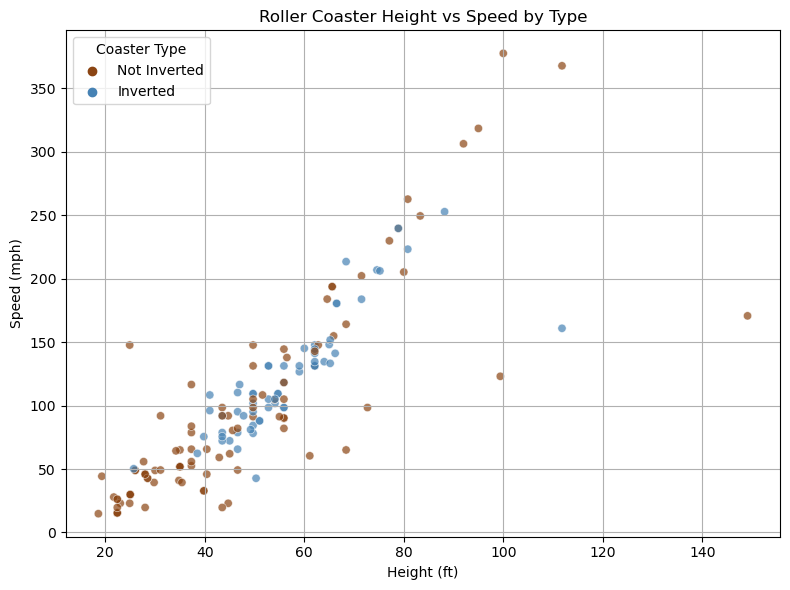

In [112]:
# Ensure you have cleaned data and appropriate columns
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=clean_data,
    x='speed_mph',
    y='height_ft',
    hue='Inverted',  # Color by the 'Inverted' column
    palette={1: 'steelblue', -1: 'saddlebrown'},  # Custom colors
    alpha=0.7,
    hue_order=[-1, 1]  # Ensure the legend displays correctly
)

# Manually adjust legend labels
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['Not Inverted', 'Inverted']  # Custom labels
plt.legend(handles, labels, title='Coaster Type', loc='upper left')

plt.title('Roller Coaster Height vs Speed by Type')
plt.xlabel('Height (ft)')
plt.ylabel('Speed (mph)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [117]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from mpl_toolkits.mplot3d import Axes3D

# # Ensure you have cleaned data and appropriate columns
# fig = plt.figure(figsize=(8, 6))
# ax = fig.add_subplot(111, projection='3d')

# # Scatter plot with 3D data
# scatter = ax.scatter(
#     clean_data['height_ft'], 
#     clean_data['speed_mph'], 
#     clean_data['Gforce_clean'],  # You can choose another column for the z-axis, like 'Gforce_clean'
#     c=clean_data['Inverted'],  # Color by 'Inverted' column
#     cmap='coolwarm',  # A color map, or use 'steelblue' and 'saddlebrown' manually
#     alpha=0.7
# )

# # Customizing the legend
# handles, labels = plt.gca().get_legend_handles_labels()
# labels = ['Not Inverted', 'Inverted']  # Custom labels
# plt.legend(handles, labels, title='Coaster Type', loc='upper left')

# # Adding labels and title
# ax.set_xlabel('Height (ft)')
# ax.set_ylabel('Speed (mph)')
# ax.set_zlabel('G-Force (g)')  # Z-axis label (change to the column you're using for z)
# ax.set_title('3D Roller Coaster Height, Speed, and G-Force')

# # Display grid
# ax.grid(True)

# plt.tight_layout()
# plt.show()


Next, we will determine the value of k we should use. We split our data into a training data set, a testing data set, and a validation set. This validation set will be applied to the training data set for different values of k to see which value of k has the highest classification accuracy. 

In [161]:

# Select features and target variable
X = clean_data[['height_ft', 'speed_mph']].values  # Features
y = clean_data['Inverted'].values  # Target (1 for Inverted, -1 for Not Inverted)

clean_data = clean_data.sample(frac=1, random_state=10).reset_index(drop=True)

# 10 - 73%

# Split the data manually (70% train, 15% test, 15% validation)
train_split = int(0.7 * len(X))
test_split = train_split + int(0.15 * len(X))
X_train, X_test, X_validation = X[:train_split], X[train_split:test_split], X[test_split:]
y_train, y_test, y_validation = y[:train_split], y[train_split:test_split], y[test_split:]


k = 5  # Number of neighbors\n",
knn = KNN(k=k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_validation)
   
accuracy_score = accuracy(y_validation, y_pred)
print(f'Accuracy for using k = {k}: {accuracy_score * 100:.2f}%')


Accuracy for using k = 5: 75.00%


Using our validation set, we will determine which value of k is optimal. 

In [162]:
k_values = range(1, 20)
validation_accuracies = []

for k in k_values:
    knn = KNN(k=k)
    knn.fit(X_train, y_train)
    y_val_pred = knn.predict(X_validation)  # Predict on validation set
    val_acc = accuracy(y_validation, y_val_pred)  # Compare to validation labels 
    validation_accuracies.append(val_acc) # Keeping track of accuracy


# Step 6: Select the best k
best_k = k_values[np.argmax(validation_accuracies)]
best_accuracy = max(validation_accuracies)
print(f'The best value of k is {best_k}')


The best value of k is 12


Now that we've found that it is optimal to use k = 12 with our validation set, we will evaluate our model on training data set.

In [164]:
# Applying testing data with the selected k value
knn = KNN(k = best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc = accuracy(y_test, y_pred)
print(f'The classification accuracy using Manhattan Distance is {round(100*acc,3)}%')

The classification accuracy using Manhattan Distance is 73.913%


This accuracy is not the most ideal although it is definitley better than guessing randomly. Let's build a confusion matrix to investigate the effectiveness of our kNN model further. 

A confusion matrix is a table that gives the false positive and false negative rates for a classification model. In this case, let a roller coaster with an inversion be a "positive" case while a roller coaster without an inversion is "negative". We have just been looking at accuracy, which looks at the total number of roller coasters that are correctly classified over the total number of roller coasters in the testing data set. 

![Confusion Matrix] (https://images.prismic.io/encord/edfa849b-03fb-43d2-aba5-1f53a8884e6f_image5.png?auto=compress,format)

A confusion matrix also let's us calculate precision and recall: 

1. Precision measures the ratio of true positives to the ratio of predicted positives. So in this case, precision would be the percentage of roller coasters predicted to be inverted roller coasters.
2. Recall measures the ratio of true positives to the ratio of all positives. So in this case, recall would be the percetnage of all inverted roller coasters that were predicted to be inverted roller coasters.

Below, we define several functions that implements the parts of a confusion matrix. 

In [1]:
def true_positive(test, pred):
    # Inputs: test and predicted data, each vectors of 1's and -1's where 1 refers to positive case, -1 refers to negative case
    # Outputs: Number of true positives

    return sum((t == 1 and p == 1) for t, p in zip(test, pred)) # Calculataing True positive

def false_positive(test, pred):
    # Inputs: test and predicted data, each vectors of 1's and -1's where 1 refers to positive case, -1 refers to negative case
    # Outputs: Number of false positives

    return sum((t == -1 and p == 1) for t, p in zip(test, pred)) # Calculating false positives

def false_negative(test, pred):
    # Inputs: test and predicted data, each vectors of 1's and -1's where 1 refers to positive case, -1 refers to negative case
    # Outputs: Number of false negative

    return sum((t == 1 and p == -1) for t, p in zip(test, pred)) # Calculating false negative

def precision(test, pred):
    # Inputs: test and predicted data, each vectors of 1's and -1's where 1 refers to positive case, -1 refers to negative case
    # Output: Precision

    tp = true_positive(test, pred) # Calculating true positives
    fp = false_positive(test, pred) # Calculating false positives
    
    return tp / (tp + fp)

def recall(test, pred):
    # Inputs: test and predicted data, each vectors of 1's and -1's where 1 refers to positive case, -1 refers to negative case
    # Output: recall

    tp = true_positive(test, pred) # Calculating true positives
    fn = false_negative(test, pred) # Calculating false negatives
    
    return tp / (tp + fn)


Now, let's repeat everything with Manhattan Distance to see if there an improvement.